In [2]:
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
#Load the dataset
df = pd.read_csv('D:\\SLIIT\\Y2S1\\AI & ML\\Project\\2025-Y2-S1-MLB-B9G2-05\\result\\outputs\\cleaned_metadata_with_image_paths.csv')


In [3]:

# Identify categorical columns (including target 'dx')
categorical_cols = ['dx', 'dx_type', 'sex', 'localization']

# One-hot encode all categorical columns (including 'dx')
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Handle any missing values in 'age' (numerical) by filling with mean (simple imputation)
if df_encoded['age'].isnull().sum() > 0:
    df_encoded['age'].fillna(df_encoded['age'].mean(), inplace=True)

# Drop identifiers if not used in model
df_encoded = df_encoded.drop(['lesion_id', 'image_id', 'image_path'], axis=1)

# Display the preprocessed DataFrame
print("\nPreprocessed DataFrame Info:")
print(df_encoded.info())
print("\nFirst 5 rows of preprocessed DataFrame:")
print(df_encoded.head())

# Optionally, save the encoded DataFrame
df_encoded.to_csv('preprocessed_metadata_onehot.csv', index=False)



Preprocessed DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4033 entries, 0 to 4032
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           4033 non-null   float64
 1   dx_bcc                        4033 non-null   bool   
 2   dx_bkl                        4033 non-null   bool   
 3   dx_mel                        4033 non-null   bool   
 4   dx_nv                         4033 non-null   bool   
 5   dx_type_consensus             4033 non-null   bool   
 6   dx_type_follow_up             4033 non-null   bool   
 7   dx_type_histo                 4033 non-null   bool   
 8   sex_male                      4033 non-null   bool   
 9   sex_unknown                   4033 non-null   bool   
 10  localization_back             4033 non-null   bool   
 11  localization_chest            4033 non-null   bool   
 12  localization_ear              40

C:\Users\weera\AppData\Local\Temp\ipykernel_14404\726776632.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='pastel')


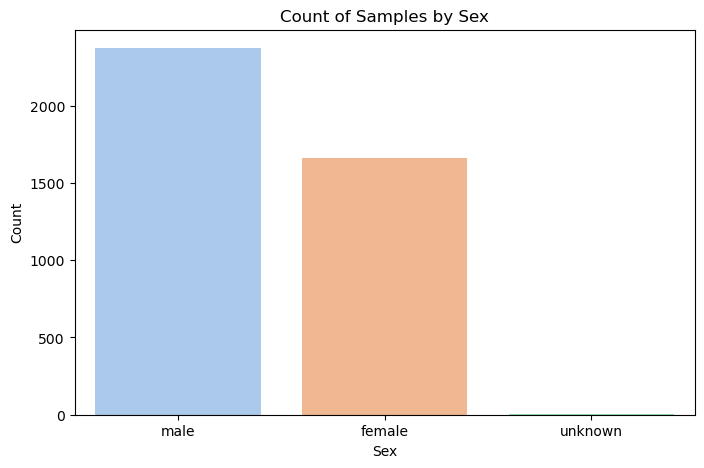

C:\Users\weera\AppData\Local\Temp\ipykernel_14404\726776632.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='localization', data=df, palette='pastel')


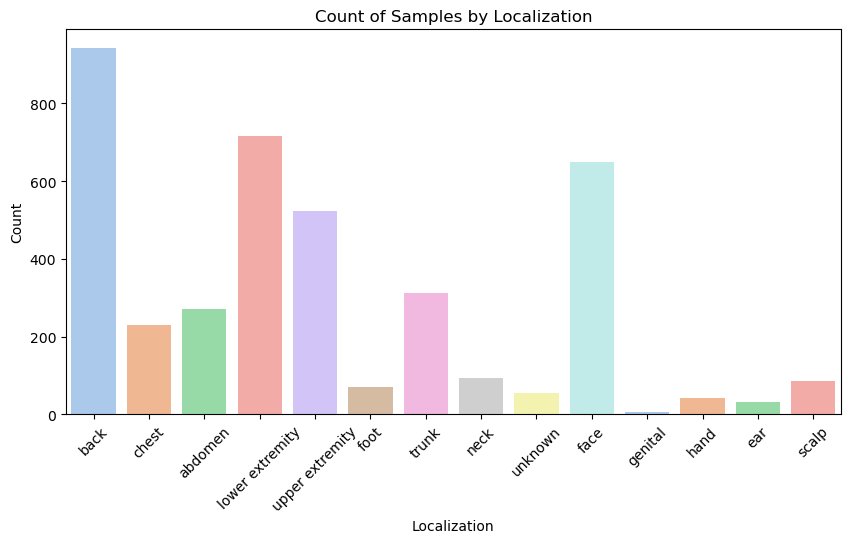

In [13]:
# count plot for 'sex'
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', data=df, palette='pastel')
plt.title("Count of Samples by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

# count plot for 'localization'
plt.figure(figsize=(10, 5))  # Slightly wider for more categories
sns.countplot(x='localization', data=df, palette='pastel')
plt.title("Count of Samples by Localization")
plt.xlabel("Localization")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()